In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("boston.csv")
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


In [3]:
df.isnull().sum()

CRIM     0
INDUS    0
NOX      0
RM       0
AGE      0
DIS      0
TAX      0
PT       0
B        0
MV       0
dtype: int64

In [4]:
x = df.drop('MV', axis=1)
y = df['MV']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=200)

In [6]:
import sklearn.tree as tree
reg = tree.DecisionTreeRegressor(max_depth=3)
reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [7]:
reg.score(x_test,y_test)

0.6712958121871693

In [8]:
import pydotplus
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=x.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

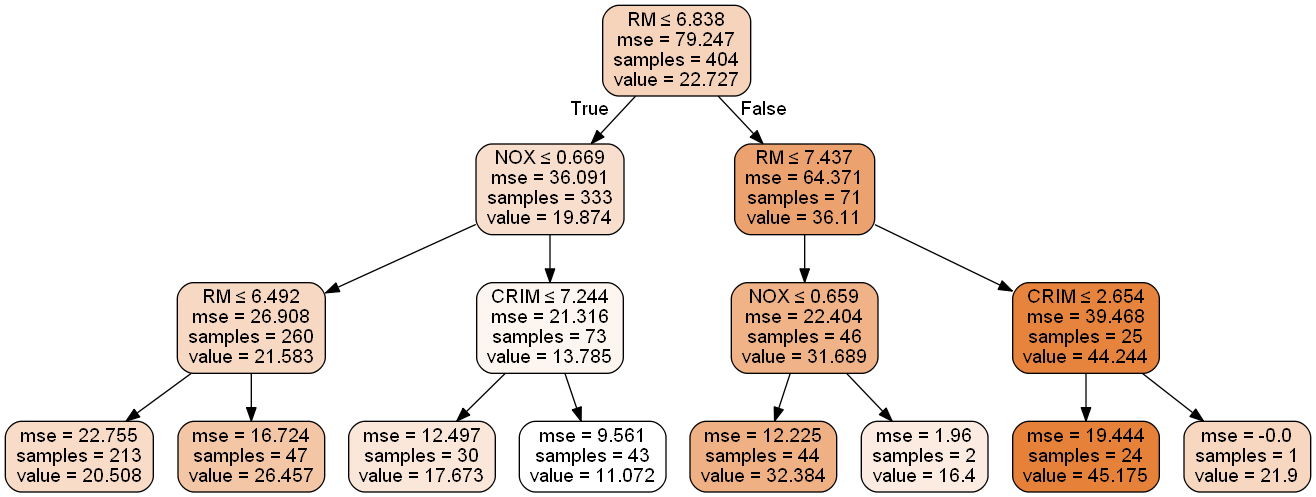

In [9]:
from IPython.display import Image
Image(graph.create_png())

In [11]:
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(reg,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=3),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [12]:
mod.best_estimator_

DecisionTreeRegressor(max_depth=3)

In [14]:
mod.best_score_

0.6872089771914467

In [15]:
###########################################################################################################

In [17]:
data = pd.read_csv("iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
data.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [20]:
data.shape

(150, 5)

In [22]:
x = data.drop('Species', axis=1)
y = data['Species']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=200)

In [33]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=2,random_state=400)

In [34]:
clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=2, random_state=400)

In [35]:
clf.score(x_test,y_test)

1.0

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=4,random_state=25)

In [37]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=4, random_state=25)

In [38]:
clf.score(x_test,y_test)

1.0

For iris data, both the ensemble models are giving out the perfect score which indicates overfitting

In [39]:
## end of notebook